In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from classifiers.logistic_regression import LogisticRegression
import pandas as pd
import numpy as np
import tqdm # interactive progress bar
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import warnings

%matplotlib inline

# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
warnings.filterwarnings('ignore')

train_df = pd.read_csv("./data/train.csv")
train_df.Prediction.value_counts(normalize=True)

review_summaries = list(train_df["Reviews_Summary"].values)
review_summaries = [l.lower() for l in review_summaries]

vectorizer = TfidfVectorizer()
tfidfed = vectorizer.fit_transform(review_summaries)
X = tfidfed
y = train_df.Prediction.values
X_train, X_test, y_train, y_test = train_test_split(
X, y, train_size=0.7, random_state=42
)

X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]

clf = LogisticRegression()

print("Start manual logistic regression" + "\n")
clf.train(X_train, y_train, verbose=True, num_iters=1000)

print("Train f1-score = %.3f" % accuracy_score(y_train, clf.predict(X_train)))
print("Test f1-score = %.3f" % accuracy_score(y_test, clf.predict(X_test)))

# clf.w = np.random.randn(X_train_sample.shape[1] + 1) * 2
# loss, grad = clf.loss(LogisticRegression.append_biases(X_train_sample), y_train_sample, 0.0)
#
# f = lambda w: clf.loss(LogisticRegression.append_biases(X_train_sample), y_train_sample, 0.0)[0]
# grad_numerical = grad_check_sparse(f, clf.w, grad, 10)



Start manual logistic regression

iteration 0 / 1000: loss 0.694743
iteration 100 / 1000: loss 0.679968
iteration 200 / 1000: loss 0.658109
iteration 300 / 1000: loss 0.650633
iteration 400 / 1000: loss 0.644665
iteration 500 / 1000: loss 0.621277
iteration 600 / 1000: loss 0.621110
iteration 700 / 1000: loss 0.605988
iteration 800 / 1000: loss 0.593753
iteration 900 / 1000: loss 0.580610
Train f1-score = 0.803
Test f1-score = 0.797


In [35]:
clf = LogisticRegression()
train_scores = []
test_scores = []
num_iters = 1000

for i in tqdm.trange(num_iters):
    # Сделайте один шаг градиентного спуска с помощью num_iters=1
    clf.train(X_train, y_train, learning_rate=1.0, num_iters=1, batch_size=256, reg=1e-3)
    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, clf.predict(X_test)))

100%|██████████| 1000/1000 [00:34<00:00, 29.21it/s]


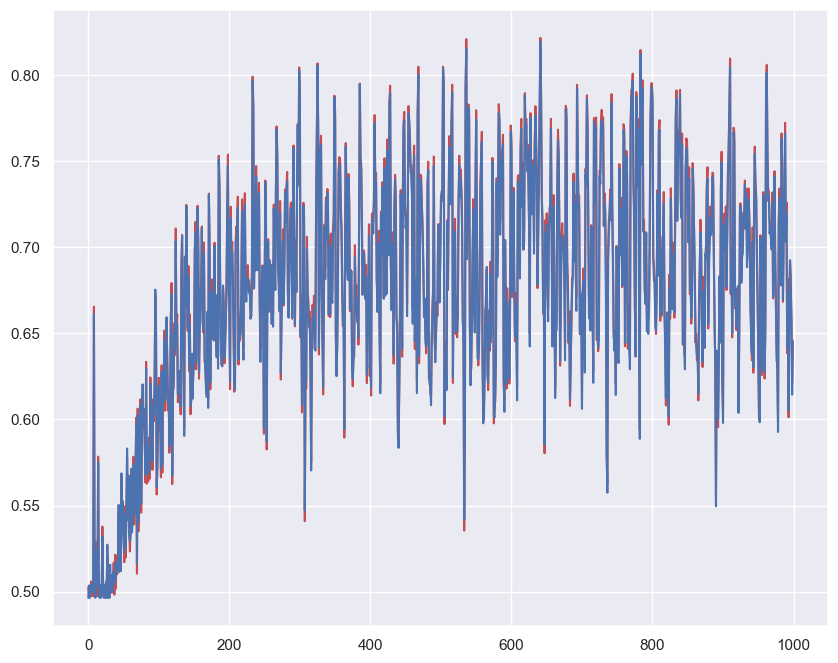

In [36]:
plt.figure(figsize=(10,8))
plt.plot(train_scores, 'r', test_scores, 'b')

In [37]:
print("\n" + "Start SGDClassifier" + "\n")

clf = SGDClassifier(
random_state=42,
loss="log_loss",
penalty="l2",
alpha=1e-3,
eta0=1.0,
learning_rate="constant",
max_iter=1000,
)
clf.fit(X_train, y_train)

print("Train accuracy = %.3f" % accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy = %.3f" % accuracy_score(y_test, clf.predict(X_test)))


Start SGDClassifier

Train accuracy = 0.816
Test accuracy = 0.812


In [38]:
# Обучите модель
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(review_summaries)
y = train_df.Prediction.values
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, random_state=42
    )
clf = LogisticRegression()
clf.train(X_train, y_train, verbose=True, learning_rate=1.0, num_iters=1000, batch_size=256, reg=1e-3)

iteration 0 / 1000: loss 0.692961
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan


In [39]:
# Получите индексы фичей
pos_features = np.argsort(clf.w)[-5:]
neg_features = np.argsort(clf.w)[:5]

In [40]:
# Выведите слова
fnames = vectorizer.get_feature_names_out()
print([fnames[p] for p in pos_features])
print([fnames[n] for n in neg_features])

['excellent', 'delicious', 'love', 'great', 'best']
['not', 'bad', 'worst', 'but', 'didn']


In [41]:
print("Train f1-score = %.3f" % accuracy_score(y_train, clf.predict(X_train)))
print("Test f1-score = %.3f" % accuracy_score(y_test, clf.predict(X_test)))

Train f1-score = 0.761
Test f1-score = 0.760
